In [1]:
!pip install numpy -q
!pip install sympy -q
!pip install git+https://github.com/einsteinpy/einsteinpy.git -q
!pip install einsteinpy  -q
!pip install -q rebound
!pip install -q astropy
!pip install -q spiceypy
!pip install -q scipy
!pip install -q astroquery

In [16]:
import numpy as np
import sympy as sp
import rebound as rb
from einsteinpy.symbolic import *
from scipy.constants import G,c
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

In [5]:
s = sp.symbols('s')
S = sp.symbols('t, r, theta, phi')
t, r, q, f = S
t_, r_, q_, f_ = 0, 1, 2, 3
gcomp = sp.diag(1-s/r, -1/(1-s/r), -r**2,-r**2*sp.sin(q)**2).tolist()

g = MetricTensor(gcomp,S)

gij = g.tensor()


In [6]:
Gijk = ChristoffelSymbols.from_metric(g)
Gijk = Gijk.tensor()


In [8]:
m_sol = rb.units.masses_SI['msolar']

## Unidades del programa

In [9]:
U_m = m_sol
U_l = G*U_m/c**2
U_t = U_l/c
print(f"Las unidades canonicas son: UL = {U_l:.3e} m, UM = {U_m:.3e} kg, UT = {U_t:.3e} s ")

Las unidades canonicas son: UL = 1.477e+03 m, UM = 1.988e+30 kg, UT = 4.926e-06 s 


## Unidades derivadas del programa

In [10]:
U_v = U_l/U_t
U_a = U_l/U_t**2
U_f = U_a*U_m
print(f"Las unidades derivadas son: UV = {U_v:.3e} m/s, UA = {U_a:.3e} m/s^2, UF = {U_f:.3e} kg*m/s^2 ")

Las unidades derivadas son: UV = 2.998e+08 m/s, UA = 6.086e+13 m/s^2, UF = 1.210e+44 kg*m/s^2 


In [11]:
m = 10
print(f"la masa a colpasar en kilogramos es 10 veces la masa solar que es : {m*U_m: .3e}Kg" )

la masa a colpasar en kilogramos es 10 veces la masa solar que es :  1.988e+31Kg


In [12]:
s = 2*m #radio de Schwarzchild, en unidades canonicas
print(f"El radio de Schwarzchild calculado para la masa dada es: {s}U_l= {s:.3e}m")

El radio de Schwarzchild calculado para la masa dada es: 20U_l= 2.000e+01m


In [14]:
def geo_edm(Y, lamb, s):
    
    t,r,q,f = Y[:4]
    ut,ur,uq,uf = Y[4:]
    
    dtdl = ut
    drdl = ur
    dqdl = uq
    dfdl = uf
    
    dutdl = -s/(r**2*(1-s/r))*ur*ut
    
   
    durdl = -s/(2*r**2)*(1-s/r)*ut**2 + (s/2*r**2)*1/(1- s/r)*ur**2 + r*(1-s/r)*(uq**2 + np.sin(q)**2*uf**2)
    
    
    duqdl = -2/r*ur*uq + np.sin(q)*np.cos(q)*uf**2
    
     
    dufdl = -2/r*ur*uf - 2*np.cos(q)/np.sin(q)*uq*uf
    
    return [dtdl, drdl, dqdl, dfdl, dutdl, durdl, duqdl, dufdl]

In [17]:
def sphere(r):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v))
    y = r * np.outer(np.sin(u), np.sin(v))
    z = r * np.outer(np.ones(np.size(u)), np.cos(v))
    return x,y,z
x,y,z = sphere(s)

/tmp/ipykernel_3042/3118493611.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(xs,ys,zs,'k-',color="orange")


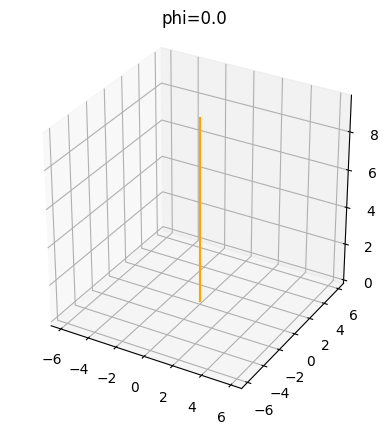

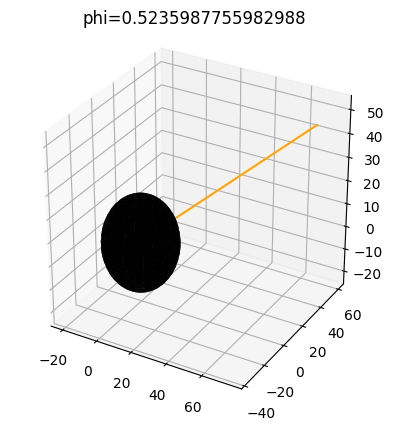

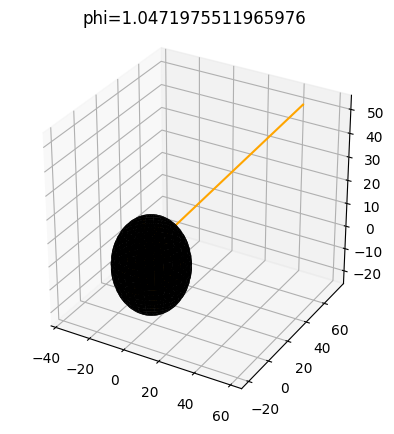

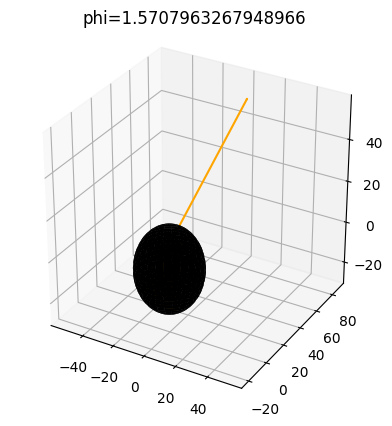

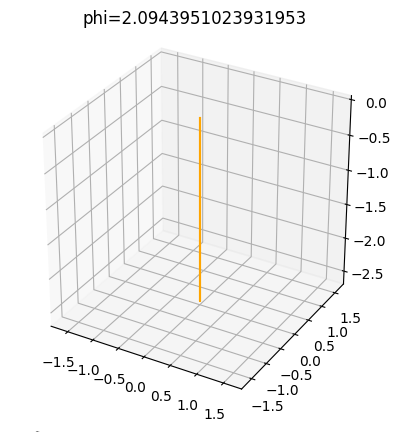

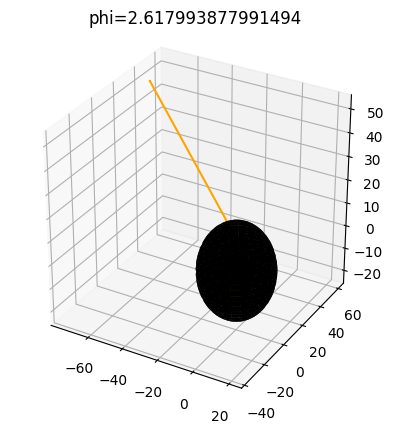

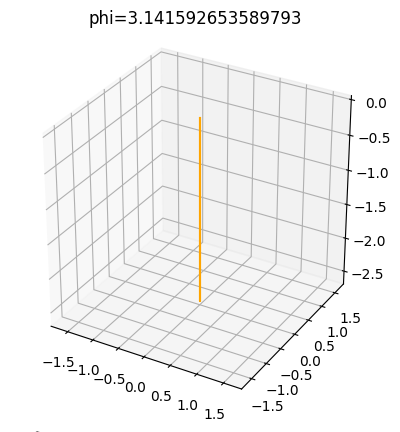

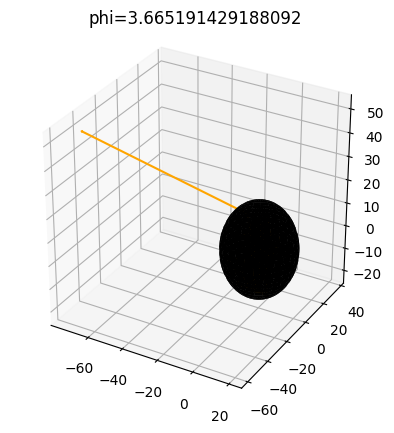

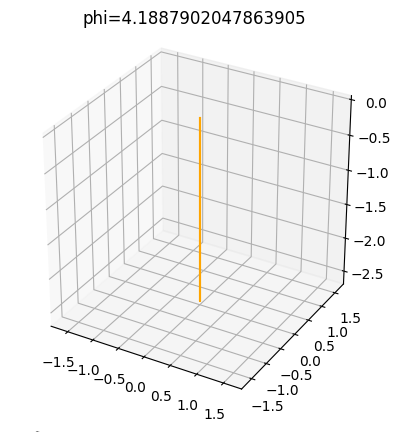

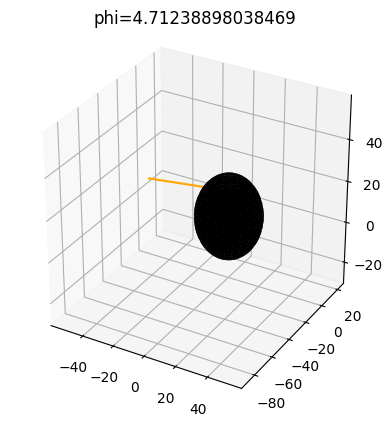

In [38]:
t = 0
r = 5*s
for i in range(0,10):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    fi = 30*np.pi/180*i
    teta = 60*np.pi/180
    v_r = 0.9
    v_teta = 0.2
    v_fi = 0.3
    ax.set_title(f"phi={fi}")
    v = (v_r**2 + v_teta**2 + v_fi**2)**0.5
    ut = 1/(1-s/r)
    ur = 1/(1-s/r)*v_r
    uq = 1/(1-s/r)*v_teta/r
    uf = 1/(1-s/r)*v_fi/(r*np.sin(teta))
    T=np.sqrt(4*np.pi**2/m*r**3) #tiempo estimado
    estado = [t, r, teta, fi, ut, ur, uq, uf] 
    geo_edm(estado,0,s)
    lambs = np.linspace(0, 5*T, 100)
    Ys = odeint(geo_edm, estado, lambs, args=(s,))
    rs = Ys[:,1]
    qs = Ys[:,2]
    fs = Ys[:,3]

    xs = rs*np.sin(qs)*np.cos(fs)
    ys = rs*np.sin(qs)*np.sin(fs)
    zs = rs*np.cos(qs)
    ax.plot(xs,ys,zs,'k-',color="orange")
    ax.plot([0], [0], [0], color='orange') 
    ax.plot_surface(x, y, z, rstride=4, cstride=4, color='black')
    ax.axis("equal")
    ax.set_box_aspect([1,1,1])


In [29]:
for i in range(0,10):
    print(i)
    

0
1
2
3
4
5
6
7
8
9
